In [2]:
import os
import rosbag
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from cv_bridge import CvBridge
bridge = CvBridge()
from PIL import Image
from tqdm import tqdm
import io
import pointcloud2 as pc2
from skimage.io import imsave

In [4]:
def numpy_image(data: any, dims: tuple) -> np.ndarray:
    """
    Return a NumPy tensor from image data.

    Args:
        data: the image data to convert to a NumPy tensor
        dims: the height and width of the image

    Returns:
        an RGB or RGBA NumPy tensor of the image data

    """
    # try to create an RGBA tensor from the image data
    try:
        return np.array(data, dtype='uint8').reshape((*dims, 4))
    # try to create an RGB tensor from the image data
    except ValueError:
        return np.array(data, dtype='uint8').reshape((*dims, 3))


def get_camera_image(data: bytes, dims: tuple) -> np.ndarray:
    """
    Get an image from binary ROS data.

    Args:
        data: the binary data to extract an image from
        dims: the expected dimensions of the image

    Returns:
        an uncompressed NumPy tensor with the 8-bit RGB pixel data

    """
    try:
        # open the compressed image using Pillow
        with Image.open(io.BytesIO(data)) as rgb_image:
            return numpy_image(rgb_image, dims)
    # if an OS error happens, the image is raw data
    except OSError:
        return numpy_image(list(data), dims)

In [5]:
def extract_pointcloud(msg):
    points = pc2.read_points(msg, skip_nans=True, field_names=('x', 'y', 'z', 'intensity'))
    result = np.array([[x, y, z, i] for x, y, z, i in points])
    return result

In [12]:
#data_path = '/media/kirill/2E493B983C144ACC/rosbags/husky_rosbags/toposlam_bags/4_and_5_floors_zip'
data_path = '/media/kirill/2E493B983C144ACC/rosbags/ITLPCampus/2023-11-09-twilight/floor_5'
output_dir = '/home/kirill/TopoSLAM/OpenPlaceRecognition/data/floor5_query'
bags = os.listdir(data_path)
bags.sort()
front_stamps_total = []
back_stamps_total = []
lidar_stamps_total = []
for bag_name in bags:
    front_images = []
    front_stamps = []
    back_images = []
    back_stamps = []
    lidar_clouds = []
    lidar_stamps = []
    bag = rosbag.Bag(os.path.join(data_path, bag_name))
    step = 0
    if not os.path.exists(os.path.join(output_dir, 'front_images')):
        os.mkdir(os.path.join(output_dir, 'front_images'))
    if not os.path.exists(os.path.join(output_dir, 'back_images')):
        os.mkdir(os.path.join(output_dir, 'back_images'))
    if not os.path.exists(os.path.join(output_dir, 'lidar_clouds')):
        os.mkdir(os.path.join(output_dir, 'lidar_clouds'))
    for topic, msg, t in tqdm(bag.read_messages()):
        if topic == '/zed_node/left/image_rect_color/compressed':
            img = get_camera_image(msg.data, (720, 1280))
            front_images.append(img)
            stamp = int(t.to_sec() * 1e9)
            front_stamps.append(stamp)
            pil_image = Image.fromarray(img)
            pil_image.save(os.path.join(output_dir, 'front_images', '{}.png'.format(stamp)))
        if topic == '/realsense_back/color/image_raw/compressed':
            img = get_camera_image(msg.data, (720, 1280))
            back_images.append(img)
            stamp = int(t.to_sec() * 1e9)
            back_stamps.append(stamp)
            pil_image = Image.fromarray(img)
            pil_image.save(os.path.join(output_dir, 'back_images', '{}.png'.format(stamp)))
        if topic == '/velodyne_points':
            pcd = extract_pointcloud(msg)
            lidar_clouds.append(pcd)
            stamp = int(t.to_sec() * 1e9)
            lidar_stamps.append(stamp)
            pcd.tofile(os.path.join(output_dir, 'lidar_clouds', '{}.bin'.format(stamp)), sep=',', format="%f")
        step += 1
        #if step > 100:
        #    break
        #cloud_fromfile = np.fromfile(os.path.join(output_dir, 'lidar_clouds', '{}.bin'.format(stamp)), sep=',', dtype=float, count=cloud.shape[0] * 4).reshape((-1, 4))
        #np.savetxt(os.path.join(output_dir, 'lidar_clouds', '{}.txt'.format(stamp)), cloud)
    front_stamps_total += front_stamps
    back_stamps_total += back_stamps
    lidar_stamps_total += lidar_stamps
np.savetxt(os.path.join(output_dir, 'front_timestamps.txt'), front_stamps_total)
np.savetxt(os.path.join(output_dir, 'back_timestamps.txt'), back_stamps_total)
np.savetxt(os.path.join(output_dir, 'lidar_timestamps.txt'), lidar_stamps_total)

12it [00:00, 49.61it/s]

1699536858562394624 1.0007488527771309 1271750542445312


37it [00:00, 38.39it/s]

1699536858662424832 1.0007488528360324 1271750642475520


61it [00:01, 47.39it/s]

1699536858765793792 1.0007488528968997 1271750745844480


85it [00:01, 42.84it/s]

1699536858865200128 1.0007488529554338 1271750845250816


107it [00:02, 47.96it/s]

1699536858965179136 1.000748853014305 1271750945229824


134it [00:03, 43.68it/s]

1699536859066188032 1.0007488530737827 1271751046238720


158it [00:03, 50.24it/s]

1699536859166953984 1.0007488531331175 1271751147004672


184it [00:04, 46.09it/s]

1699536859268331264 1.000748853192812 1271751248381952


210it [00:04, 52.84it/s]

1699536859368675584 1.0007488532518984 1271751348726272


237it [00:05, 47.93it/s]

1699536859470559232 1.0007488533118911 1271751450609920


262it [00:05, 52.36it/s]

1699536859569824000 1.000748853370342 1271751549874688


295it [00:06, 52.37it/s]

1699536859672124416 1.00074885343058 1271751652175104


320it [00:06, 57.22it/s]

1699536859772675584 1.0007488534897881 1271751752726272


349it [00:07, 51.48it/s]

1699536859872686080 1.000748853548678 1271751852736768


374it [00:07, 56.24it/s]

1699536859974093056 1.0007488536083902 1271751954143744


399it [00:08, 45.05it/s]

1699536860075614464 1.0007488536681697 1271752055665152


425it [00:08, 52.81it/s]

1699536860175418368 1.0007488537269378 1271752155469056


451it [00:09, 46.57it/s]

1699536860275874816 1.00074885378609 1271752255925504


474it [00:09, 47.81it/s]

1699536860377297152 1.0007488538458114 1271752357347840


506it [00:10, 50.74it/s]

1699536860477936896 1.0007488539050715 1271752457987584


529it [00:10, 51.96it/s]

1699536860579196928 1.0007488539646971 1271752559247616


558it [00:11, 47.07it/s]

1699536860679899392 1.0007488540239944 1271752659950080


568it [00:11, 49.51it/s]


KeyboardInterrupt: 

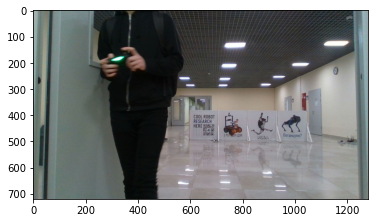

In [8]:
plt.imshow(img)

In [104]:
import numpy as np
import pandas as pd
#track1 = pd.read_csv('../data/floor5_old_processed/track.csv')
#track1 = np.loadtxt('../data/indoor/2023-11-09-twilight/floor/trajectory.tum')
track1 = np.loadtxt('../data/outdoor/05_2023-08-15-day/trajectory.tum')
track2 = np.loadtxt('../data/outdoor/06_2023-08-18-night/trajectory.tum')

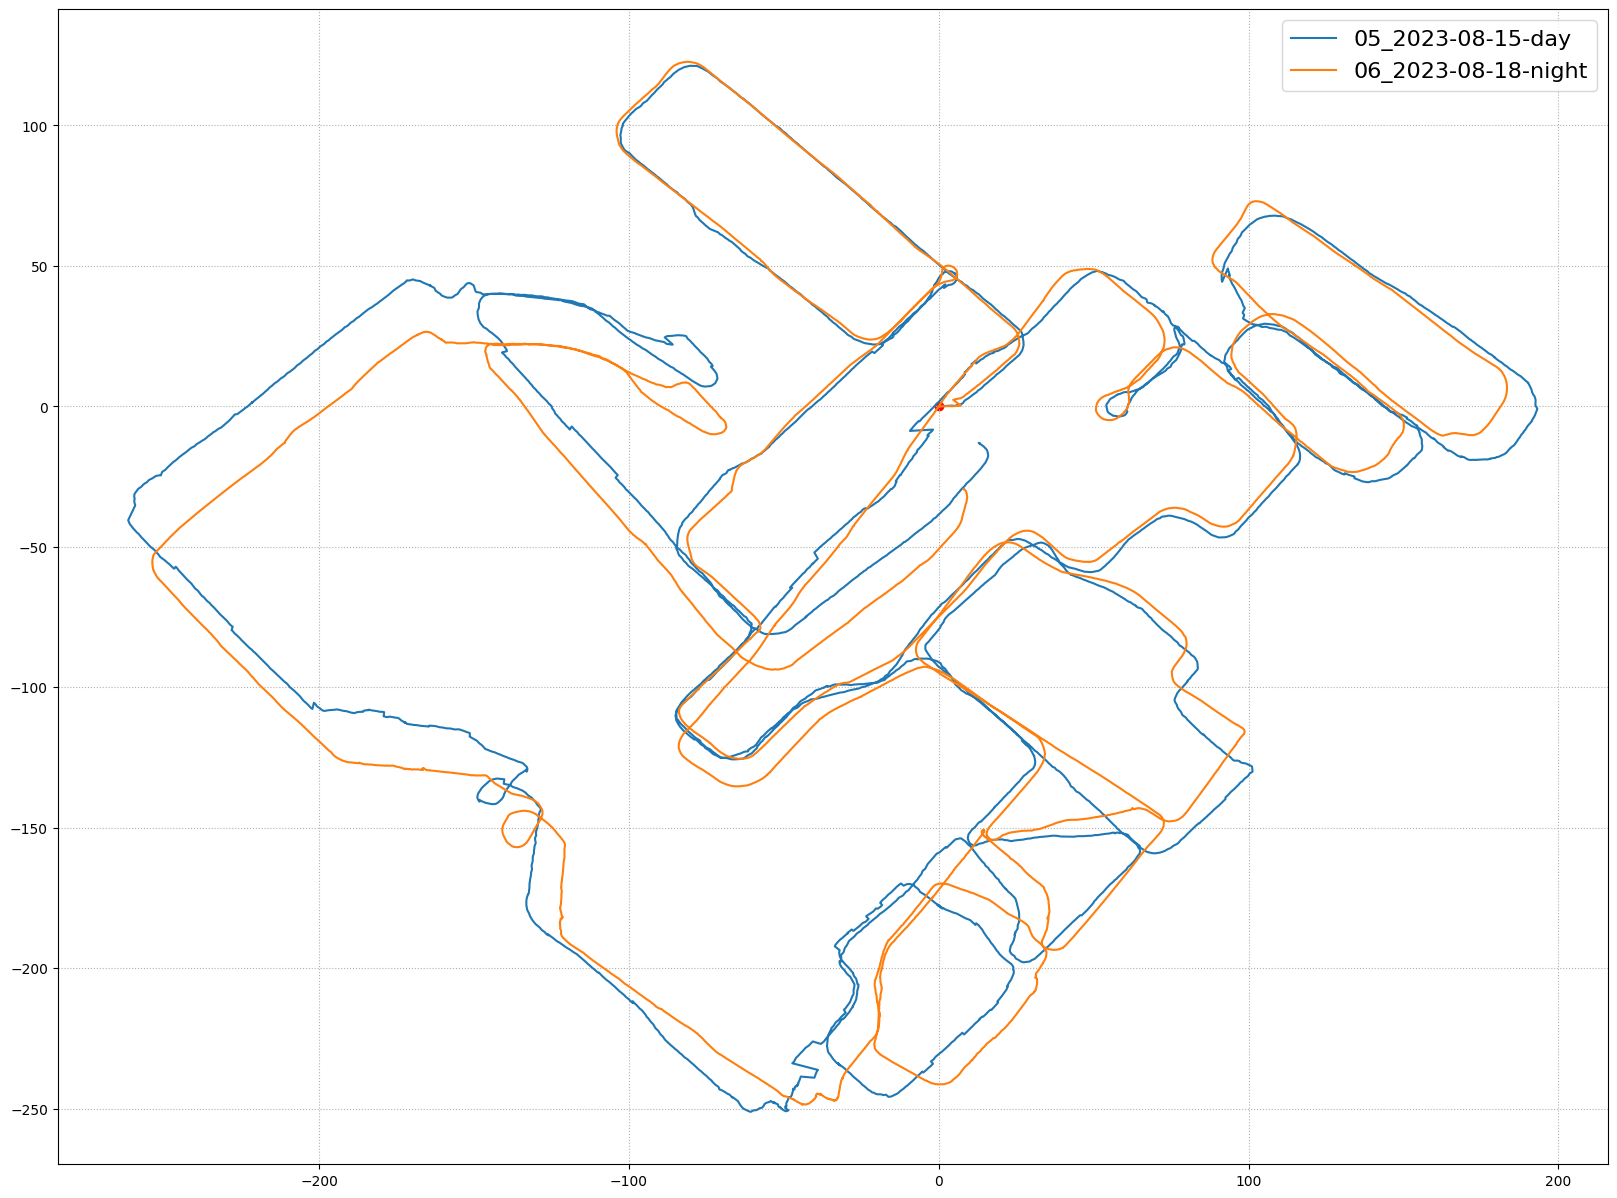

In [107]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(20, 15))
#plt.plot(track1['tx'], track1['ty'])
plt.plot(track1[:, 1], track1[:, 2], label='05_2023-08-15-day')
plt.plot(track2[:, 1], track2[:, 2], label='06_2023-08-18-night')
plt.grid(ls=':')
plt.scatter([0], [0], color='r')
plt.legend(fontsize=16)
plt.savefig('trajectories.png')

In [76]:
import rosbag
input_bag = rosbag.Bag('/media/kirill/2E493B983C144ACC/rosbags/ITLPCampus/floor_5/2023-10-25-23-19-54_1.bag', 'r')
output_bag = rosbag.Bag('/media/kirill/2E493B983C144ACC/rosbags/ITLPCampus/floor_5/2023-10-25-23-19-54_2.bag', 'w')
for topic, msg, t in input_bag.read_messages():
    if t.secs < 1698265248 or t.secs > 1698265250:
        output_bag.write(topic, msg, t)
output_bag.close()

ModuleNotFoundError: No module named 'Cryptodome'